<a href="https://colab.research.google.com/github/eduardodacostasoares/Data_Science/blob/master/broken_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score ,recall_score , roc_curve,roc_auc_score,plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [ ]:
#df2 foi criado para facilitar o treinamento do modelo.
df = pd.read_csv ('/content/gdrive/MyDrive/datasets/heart.xls')
df2=df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# **TRATAMENTO DOS DADOS**#

###Alteração dos nomes dos valores, para facilitar a visualização###

**Coluna 'HeartDisease'**

In [ ]:
# print para mostrar os valores únicos.
print(df['HeartDisease'].unique())

[0 1]


In [ ]:
#Comando de repetição para troca de valores da coluna 'HeartDisease'
for i in range(len(df['HeartDisease'])):
  if df['HeartDisease'][i] == 0:
    df.loc[i, 'HeartDisease'] = 'Saudável'

  else:
    df.loc[i, 'HeartDisease'] = 'Doente cardíaco'


In [ ]:
print(df['HeartDisease'].unique())

['Saudável' 'Doente cardíaco']


**Coluna 'ST_slope'**

In [ ]:
#'ST_Slope'
# print para mostrar os valores únicos.
print(df['ST_Slope'].unique())

['Up' 'Flat' 'Down']


In [ ]:
#Comando de repetição para troca de valores da coluna 'HeartDisease'
for i in range(len(df['ST_Slope'])):
  if df['ST_Slope'][i] == 'Up':
    df.loc[i, 'ST_Slope'] = 'Ascendente'

  if df['ST_Slope'][i] == 'Flat':
    df.loc[i, 'ST_Slope'] = 'Plano'

  if df['ST_Slope'][i] == 'Down':
    df.loc[i, 'ST_Slope'] = 'Descendente'

In [ ]:
print(df['ST_Slope'].unique())

['Ascendente' 'Plano' 'Descendente']


**Coluna 'ExerciseAngina'**

In [ ]:
# print para mostrar os valores únicos.
print(df['ExerciseAngina'].unique())

['N' 'Y']


In [ ]:
#Comando de repetição para troca de valores da coluna 'ExerciseAngina'
for i in range(len(df['ExerciseAngina'])):
  if df['ExerciseAngina'][i] == 'Y':
    df.loc[i, 'ExerciseAngina'] = 'Sim'

  else:
    df.loc[i, 'ExerciseAngina'] = 'Não'

In [ ]:
print(df['ExerciseAngina'].unique())

['Não' 'Sim']


**Coluna 'RestingECG'**

In [ ]:
# print para mostrar os valores únicos.
print(df['RestingECG'].unique())

['Normal' 'ST' 'LVH']


In [ ]:
#Comando de repetição para troca de valores da coluna 'RestingECG'
for i in range(len(df['RestingECG'])):
  if df['RestingECG'][i] == 'ST':
    df.loc[i, 'RestingECG'] = 'Anormalidade em ST/T'

  if df['RestingECG'][i] == 'LVH':
    df.loc[i, 'RestingECG'] = 'HVE'

In [ ]:
print(df['RestingECG'].unique())

['Normal' 'Anormalidade em ST/T' 'HVE']


**Coluna 'FastingBS'**

In [ ]:
# print para mostrar os valores únicos.
print(df['FastingBS'].unique())

[0 1]


In [ ]:
#Comando de repetição para troca de valores da coluna 'FastingBS'
for i in range(len(df['FastingBS'])):
  if df['FastingBS'][i] == 0:
    df.loc[i, 'FastingBS'] = 'Normal'

  else:
    df.loc[i, 'FastingBS'] = 'Diabético(a)'

In [ ]:
print(df['FastingBS'].unique())

['Normal' 'Diabético(a)']


**Coluna 'ChestPainType'**


In [ ]:
# print para mostrar os valores únicos.
print(df['ChestPainType'].unique())

['ATA' 'NAP' 'ASY' 'TA']


In [ ]:
#Comando de repetição para troca de valores da coluna 'ChestPainType'
for i in range(len(df['ChestPainType'])):
  if df['ChestPainType'][i] == 'ATA':
    df.loc[i, 'ChestPainType'] = 'Angina Atípica'

  if df['ChestPainType'][i] == 'NAP':
    df.loc[i, 'ChestPainType'] = 'Dor Não-Anginal'

  if df['ChestPainType'][i] == 'ASY':
    df.loc[i, 'ChestPainType'] = 'Assintomático'

  if df['ChestPainType'][i] == 'TA':
    df.loc[i, 'ChestPainType'] = 'Angina'

In [ ]:
print(df['ChestPainType'].unique())

['Angina Atípica' 'Dor Não-Anginal' 'Assintomático' 'Angina']


**Coluna 'Sex'**

In [ ]:
# print para mostrar os valores únicos.
print(df['Sex'].unique())

['M' 'F']


In [ ]:
#Comando de repetição para troca de valores da coluna 'Sex'
for i in range(len(df['Sex'])):
  if df['Sex'][i] == 'M':
    df.loc[i, 'Sex'] = 'Masculino'

  else:
    df.loc[i, 'Sex'] = 'Feminino'

In [ ]:
print(df['Sex'].unique())

['Masculino' 'Feminino']


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Masculino,Angina Atípica,140,289,Normal,Normal,172,Não,0.0,Ascendente,Saudável
1,49,Feminino,Dor Não-Anginal,160,180,Normal,Normal,156,Não,1.0,Plano,Doente cardíaco
2,37,Masculino,Angina Atípica,130,283,Normal,Anormalidade em ST/T,98,Não,0.0,Ascendente,Saudável
3,48,Feminino,Assintomático,138,214,Normal,Normal,108,Sim,1.5,Plano,Doente cardíaco
4,54,Masculino,Dor Não-Anginal,150,195,Normal,Normal,122,Não,0.0,Ascendente,Saudável


**ANÁLISE E EXPLORAÇÃO DOS DADOS**



In [ ]:
df.columns = ['Idade', 'Sexo', 'Tipo de dor no peito', 'Pressão sanguínea (mmHg)',
          'Colesterol total (mg/dl)', 'Glicemia', 'ECG em repouso',
          'Freq. cardíaca máxima (bpm)', 'Angina por esforço',
          'Segmento ST (depressão)', 'Segmento ST (elevação)', 'Saúde cardíaca']

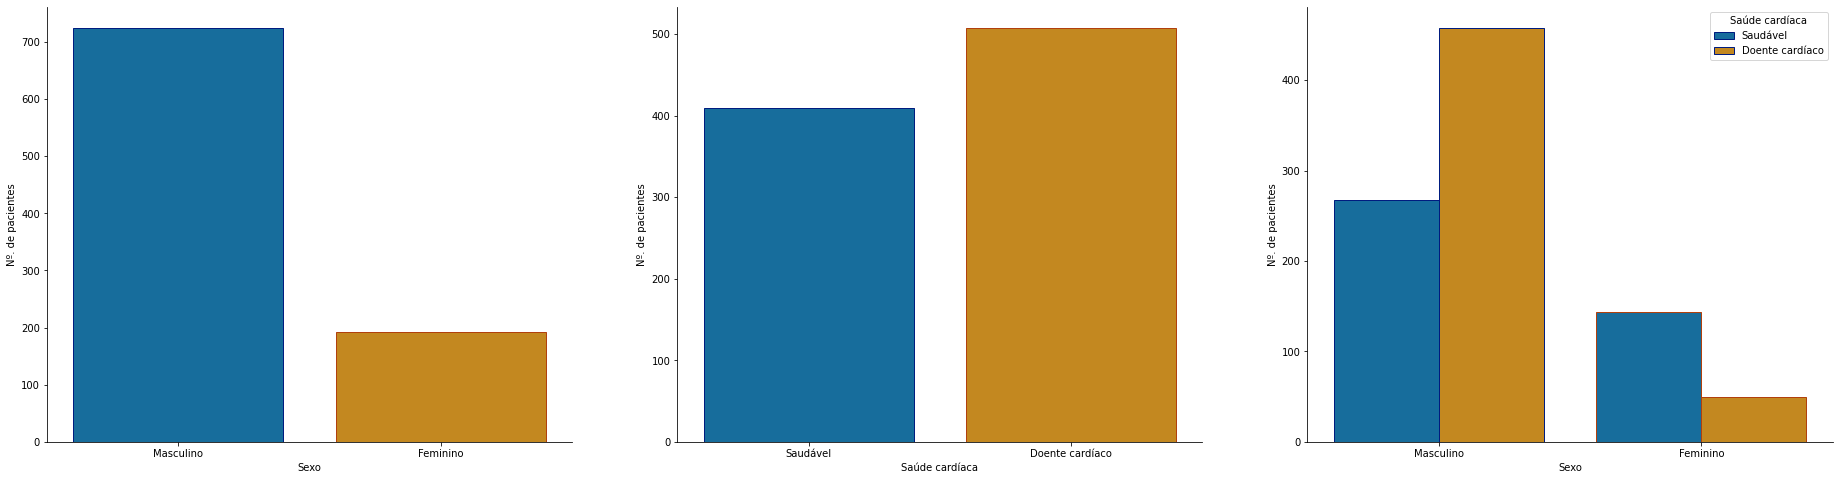

In [ ]:
df_idade= df.loc[:,["Sexo","Saúde cardíaca"]]
fig,ax= plt.subplots(1,3,figsize=(32,8))
count_A = sns.countplot(x=df_idade["Sexo"],palette=sns.color_palette("colorblind"),edgecolor=sns.color_palette("dark", 3),ax=ax[0])
count_A.set_ylabel("Nº. de pacientes")
sns.despine()
count_B = sns.countplot(x=df_idade["Saúde cardíaca"],palette=sns.color_palette("colorblind"),edgecolor=sns.color_palette("dark", 3),ax=ax[1])
count_B.set_ylabel("Nº. de pacientes")
sns.despine()
count_C = sns.countplot(data=df,x="Sexo",hue="Saúde cardíaca",palette=sns.color_palette("colorblind"),edgecolor=sns.color_palette("dark", 3),ax=ax[2])
count_C.set_ylabel("Nº. de pacientes")
sns.despine()

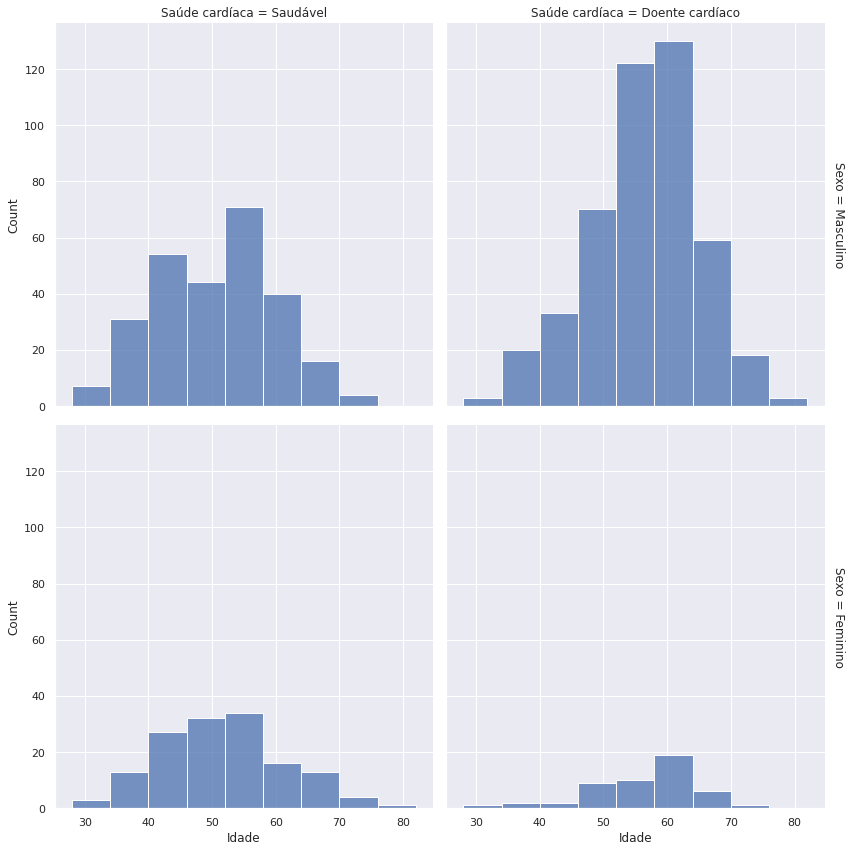

In [ ]:
sns.set_theme(style="darkgrid")
df_copy =df.copy()
sns.displot(df, x="Idade", col="Saúde cardíaca", row="Sexo",
    binwidth=6, height=6, facet_kws=dict(margin_titles=True))

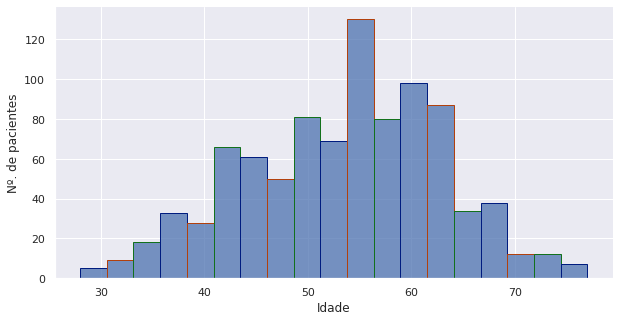

In [ ]:
plt.figure(figsize=(10,5))
hp = sns.histplot(x=df.Idade,palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
hp.set_ylabel("Nº. de pacientes")
sns.despine()

In [ ]:
df_idade = df.assign(Faixa=pd.cut(df["Idade"], bins=[0,30,41,45,50,55,60, 65,100])).loc[:,["Faixa", "Saúde cardíaca"]].assign(count_pointer=1).groupby(["Faixa", "Saúde cardíaca"]).agg(Pacientes=("count_pointer","count"))
df_idade = df_idade.reset_index()
df_idade

,Faixa,Saúde cardíaca,Pacientes
0,"(0, 30]",Doente cardíaco,0
1,"(0, 30]",Saudável,5
2,"(30, 41]",Doente cardíaco,38
3,"(30, 41]",Saudável,74
4,"(41, 45]",Doente cardíaco,23
5,"(41, 45]",Saudável,56
6,"(45, 50]",Doente cardíaco,64
7,"(45, 50]",Saudável,56
8,"(50, 55]",Doente cardíaco,96
9,"(50, 55]",Saudável,100


In [ ]:
df_dor = df.assign(dor=1).loc[:,["Tipo de dor no peito","Saúde cardíaca","dor"]].groupby(["Tipo de dor no peito","Saúde cardíaca"]).agg(count_num=("dor","sum")).reset_index()
df_dor.rename(columns={"count_num": "Número de pacientes"}, inplace=True)
df_dor

,Tipo de dor no peito,Saúde cardíaca,Número de pacientes
0,Angina,Doente cardíaco,20
1,Angina,Saudável,26
2,Angina Atípica,Doente cardíaco,24
3,Angina Atípica,Saudável,149
4,Assintomático,Doente cardíaco,392
5,Assintomático,Saudável,104
6,Dor Não-Anginal,Doente cardíaco,72
7,Dor Não-Anginal,Saudável,131


In [ ]:
df_glicemia = df.assign(count_num=1).loc[:,["Glicemia","Saúde cardíaca","count_num"]].groupby(["Glicemia","Saúde cardíaca"]).agg(Pacientes=("count_num","sum")).reset_index()
df_glicemia

,Glicemia,Saúde cardíaca,Pacientes
0,Diabético(a),Doente cardíaco,170
1,Diabético(a),Saudável,44
2,Normal,Doente cardíaco,338
3,Normal,Saudável,366


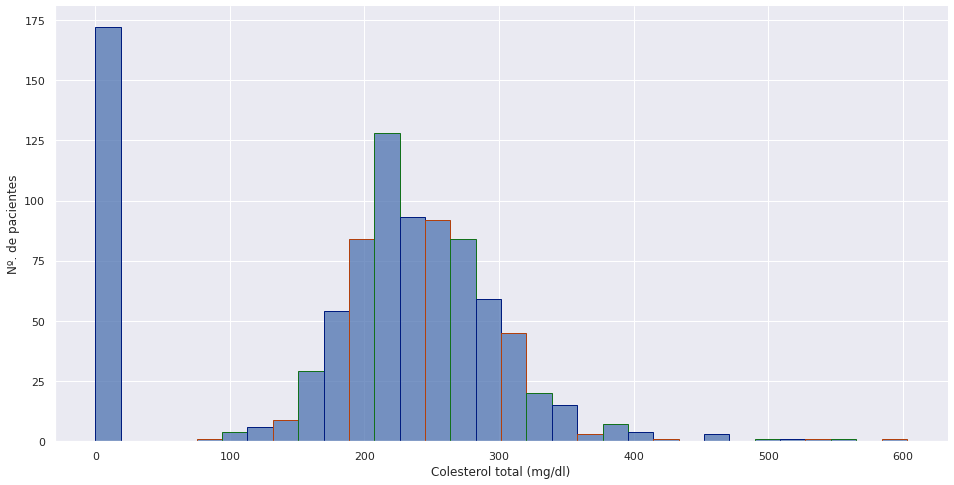

In [ ]:
plt.figure(figsize=(16,8))
df_colesterol = sns.histplot(df, x="Colesterol total (mg/dl)",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
df_colesterol.set_ylabel("Nº. de pacientes")
sns.despine()

In [ ]:
df_colesterol = df.assign(count_num=1).loc[:,["Colesterol total (mg/dl)","Saúde cardíaca","count_num"]].groupby(["Saúde cardíaca", "Colesterol total (mg/dl)"]).agg(Pacientes=("count_num","sum")).reset_index()
df_colesterol

,Saúde cardíaca,Colesterol total (mg/dl),Pacientes
0,Doente cardíaco,0,152
1,Doente cardíaco,100,1
2,Doente cardíaco,110,1
3,Doente cardíaco,113,1
4,Doente cardíaco,117,1
...,...,...,...
339,Saudável,412,1
340,Saudável,417,1
341,Saudável,458,1
342,Saudável,468,1


In [ ]:
#removendo os valores "0" do atributo "Colesterol total (mg/dl)" (aqui é apenas para mostrar os dados; o memso procedimento será feito em df2)

df = df[df['Colesterol total (mg/dl)'] != 0]
df['Colesterol total (mg/dl)']

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Colesterol total (mg/dl), Length: 746, dtype: int64

Text(0, 0.5, 'Nº. de pacientes')

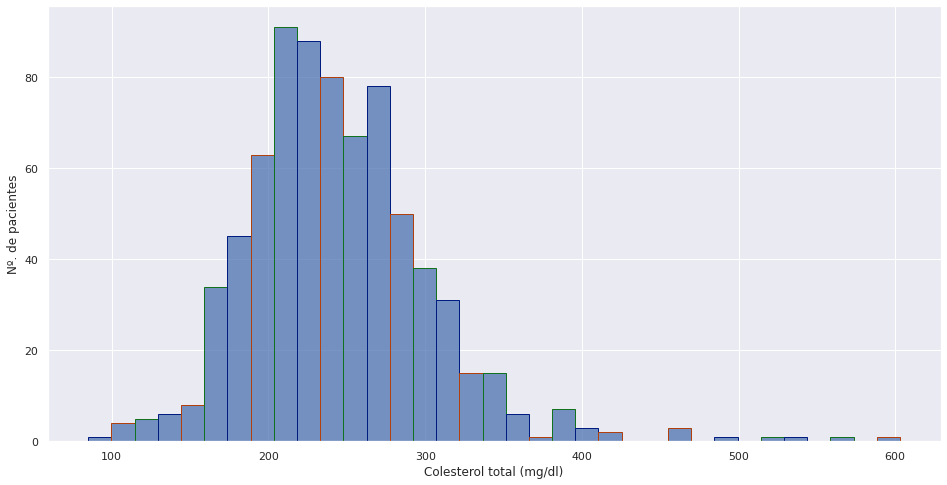

In [ ]:
#visualizando como os dados ficaram após a remoção dos valores "0".
plt.figure(figsize=(16,8))
df_colesterol = sns.histplot(df, x="Colesterol total (mg/dl)",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
df_colesterol.set_ylabel("Nº. de pacientes")

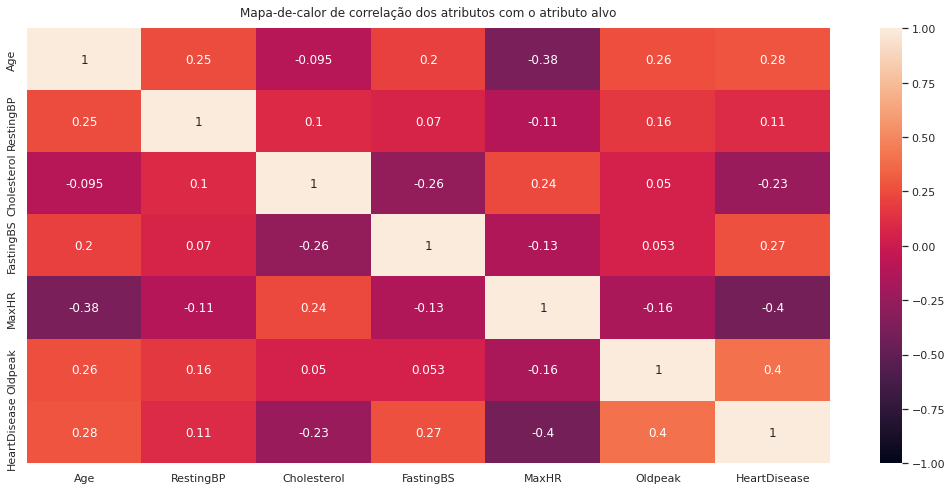

In [ ]:
#Visualizando o mapa de correlação, dos elementos originais.

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Mapa-de-calor de correlação dos atributos com o atributo alvo', fontdict={'fontsize':12}, pad=12);

In [ ]:
#Aplicando o "One hot encoding" para transformar valores categóricos em numéricos.
r_cols = df.select_dtypes(include="object").columns.tolist()
for r in r_cols:
    df[r] = df[r].apply(lambda y:r+"_"+y)
    d = pd.get_dummies(df[r])
    df = pd.concat([df,d],axis=1)
    df.drop(columns=r,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Idade                                 746 non-null    int64  
 1   Pressão sanguínea (mmHg)              746 non-null    int64  
 2   Colesterol total (mg/dl)              746 non-null    int64  
 3   Freq. cardíaca máxima (bpm)           746 non-null    int64  
 4   Segmento ST (depressão)               746 non-null    float64
 5   Sexo_Feminino                         746 non-null    uint8  
 6   Sexo_Masculino                        746 non-null    uint8  
 7   Tipo de dor no peito_Angina           746 non-null    uint8  
 8   Tipo de dor no peito_Angina Atípica   746 non-null    uint8  
 9   Tipo de dor no peito_Assintomático    746 non-null    uint8  
 10  Tipo de dor no peito_Dor Não-Anginal  746 non-null    uint8  
 11  Glicemia_Diabético(

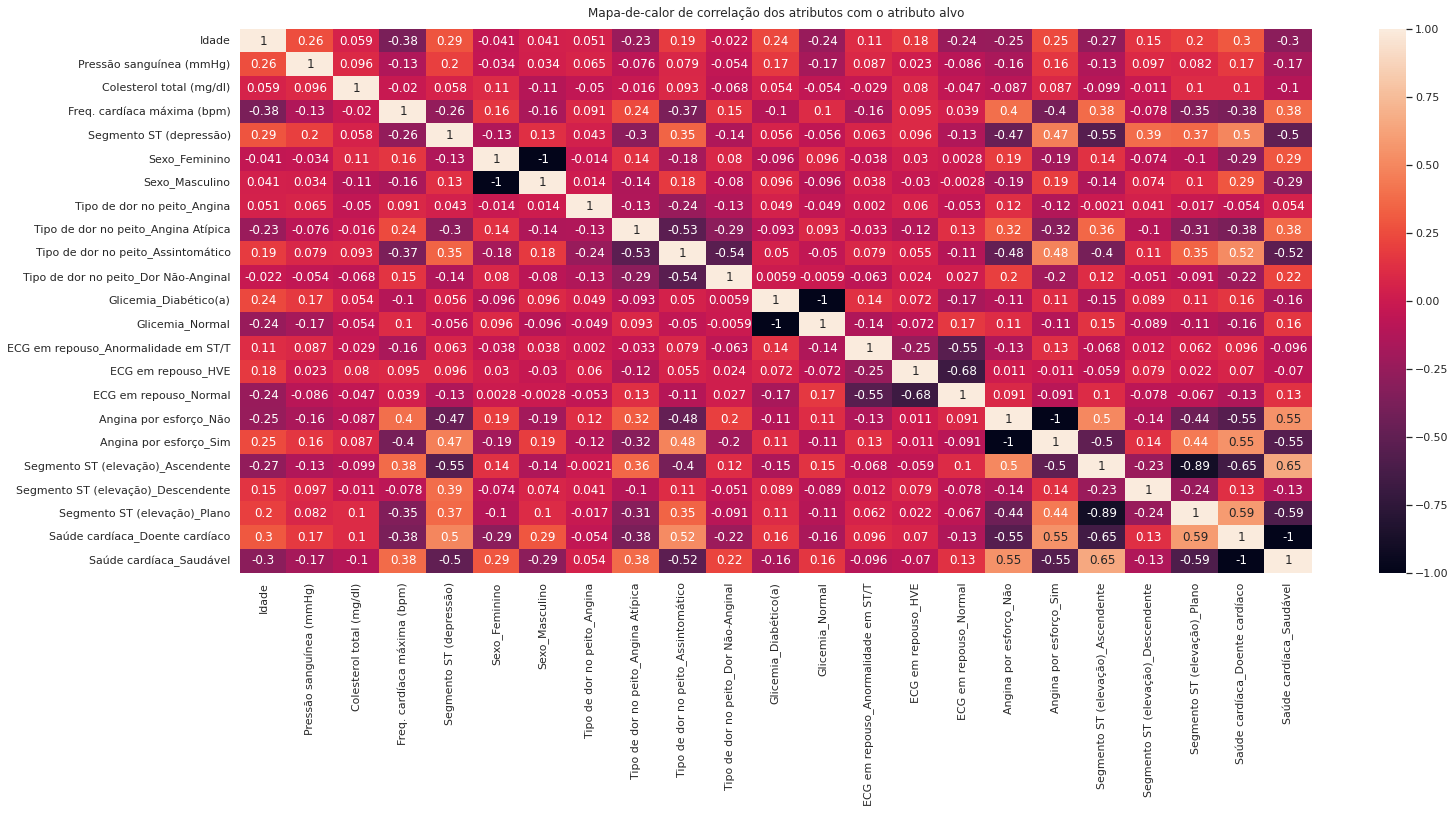

In [ ]:
#Visualizando o mapa de correlação (df)

plt.figure(figsize=(24, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Mapa-de-calor de correlação dos atributos com o atributo alvo', fontdict={'fontsize':12}, pad=12);

In [ ]:
#Aplicando o "one Hot Coding" na base (df2) que será usada pelo modelo.

r_cols = df2.select_dtypes(include="object").columns.tolist()
for r in r_cols:
    df2[r] = df2[r].apply(lambda y:r+"_"+y)
    d = pd.get_dummies(df2[r])
    df2 = pd.concat([df2,d],axis=1)
    df2.drop(columns=r,inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

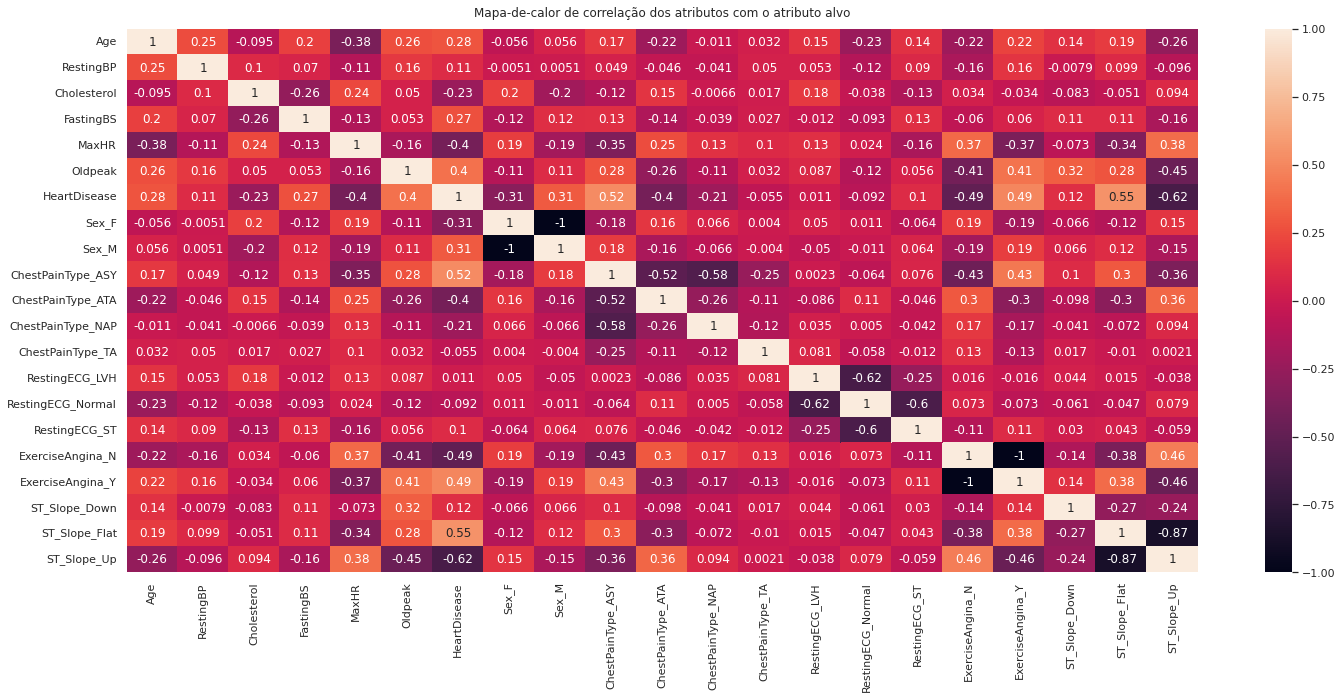

In [ ]:
#Visualizando o mapa de correlação para o treino/teste (df2)

plt.figure(figsize=(24, 10))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Mapa-de-calor de correlação dos atributos com o atributo alvo', fontdict={'fontsize':12}, pad=12);

# **PREPARAÇÃO DOS DADOS PARA OS MODELOS DE APRENDIZAGEM DE MÁQUINA**

Dividindo a base e treinando o modelo.

In [ ]:
#Dividindo em base de testes (25%) e base de treino (75%) com randomização setada em 123.
df_A = df2["HeartDisease"]
df_B = df2.drop(columns=['RestingBP', 'Cholesterol', 'MaxHR', "HeartDisease",
                         'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
                         'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
                         'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
                         'ST_Slope_Down', 'ST_Slope_Up'])
X_train,X_test,y_train,y_test = train_test_split(df_B,df_A,test_size=0.20,random_state=123)

In [ ]:
#Aplicação do GridSearchCV para encontrar o melhor valor ao hiperparâmetro "C"
logist = LogisticRegression(random_state=123)
param_grid = {"C":[0.01, 0.04, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]}
grid = GridSearchCV(estimator=logist,param_grid=param_grid)
grid.fit(X_train,y_train)
grid.best_estimator_

LogisticRegression(C=0.2, random_state=123)


--------------------------------
Score:                       0.86
Recall ou Revocação:         0.91
AUC (Area Under the Curve):  0.87
--------------------------------



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


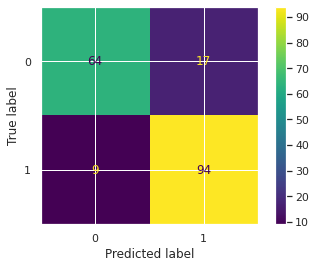

In [ ]:
#classificador de Regressão Logística, com hiperparâmetro "C" em 0.2 (valor dado pelo GridSearchCV) usando todos os atributos

logs = LogisticRegression(C=0.2,random_state=123)
logs.fit(X_train,y_train)

y_log = logs.predict(X_test)
recall_log = round(recall_score(y_test,y_log),2)
log_prob = logs.predict_proba(X_test)[:,1]
log_auc = round(roc_auc_score(y_test,log_prob),2)
log_score = round(logs.score(X_test,y_test),2)
log_dic = {"recall_score":recall_log,"score":log_score,"auc":log_auc}

print('')
print('--------------------------------')
print("Score:                      ",log_score)
print("Recall ou Revocação:         {}".format(recall_log))
print("AUC (Area Under the Curve): ",log_auc)
print('--------------------------------')
print('')
plot_confusion_matrix(logs,X_test,y_test)
plt.show()

## **OUTROS MODELOS (COMPARISON WITH OTHER MODELS)**



**Árvore de Decisão (*Decision Tree*)**


----------------------------------
Score:                       0.78
Recall ou Revocação:         0.83
AUC (Area Under the Curve):  0.8
----------------------------------



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


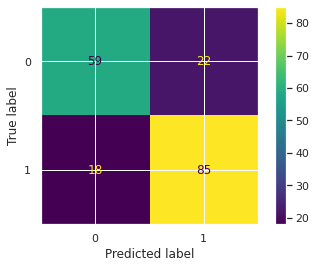

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_test = dt.predict(X_test)
recall_dt = round(recall_score(y_test, dt_test), 2)
dt_prob = dt.predict_proba(X_test)[:,1]
dt_auc = round(roc_auc_score(y_test,dt_prob),2)
dt_score = round(dt.score(X_test,y_test),2)

dt_dic = {"recall_score":recall_dt,"score":dt_score,"auc":dt_auc}
print('')
print('----------------------------------')
print("Score:                      ",dt_score)
print("Recall ou Revocação:         {}".format(recall_dt))
print("AUC (Area Under the Curve): ",dt_auc)
print('----------------------------------')
print('')
plot_confusion_matrix(dt,X_test,y_test)
plt.show()

**Support Vector Classifier (SVC)**


----------------------------------
Score:                       0.67
Recall ou Revocação:         0.83
AUC (Area Under the Curve):  0.76
----------------------------------



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



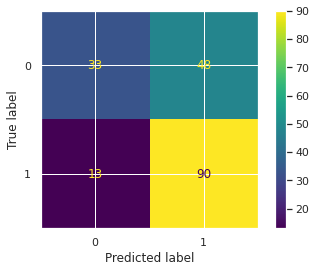

In [ ]:
svc = SVC(probabilit)
svc.fit(X_train, y_train)

svc_test = svc.predict(X_test)
recall_svc = round(recall_score(y_test, svc_test), 2)
svc_prob = svc.predict_proba(X_test)[:,1]
svc_auc = round(roc_auc_score(y_test,svc_prob),2)
svc_score = round(svc.score(X_test,y_test),2)

svc_dic = {"recall_score":recall_svc,"score":svc_score,"auc":svc_auc}
print('')
print('----------------------------------')
print("Score:                      ",svc_score)
print("Recall ou Revocação:         {}".format(recall_dt))
print("AUC (Area Under the Curve): ",svc_auc)
print('----------------------------------')
print('')
plot_confusion_matrix(svc,X_test,y_test)
plt.show()

**Multi-Layer Perceptron (MLP)**


--------------------------------
score:             0.85
recall_call:       0.93
auc_score:         0.87

-------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


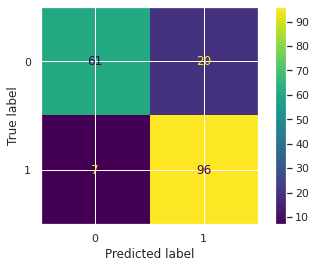

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,10),solver="lbfgs")
mlp.fit(X_train,y_train)

mlp_test = mlp.predict(X_test)
recall_mlp = round(recall_score(y_test,mlp_test),2)
mlp_prob = mlp.predict_proba(X_test)[:,1]
mlp_auc = round(roc_auc_score(y_test,mlp_prob),2)
mlp_score = round(mlp.score(X_test,y_test),2)

mlp_dic = {"recall_score":recall_mlp,"score":mlp_score,"auc":mlp_auc}
print('')
print('--------------------------------')
print("score:            ",mlp_score)
print("recall_call:       {}".format(recall_mlp))
print("auc_score:        ",mlp_auc)
print('')
print('-------------------------------')
plot_confusion_matrix(mlp,X_test,y_test)
plt.show()

# **DISCUSSÃO SOBRE OS DADOS**

Comparação

In [ ]:
r_log = pd.Series(log_dic,name="reg_log")
svcla = pd.Series(svc_dic,name="svc")
dtree = pd.Series(dt_dic, name = "dt")
mlper = pd.Series(mlp_dic,name="mlp")

compar = pd.concat([r_log, svcla, dtree, mlper],axis=1).reset_index().rename({"index":"Métrica"},axis=1)
medida = pd.melt(compar,id_vars="Métrica",value_vars=["reg_log", "svc", "dt", "mlp"],var_name=["Modelo"],value_name="Valores")
medida

,Métrica,Modelo,Valores
0,recall_score,reg_log,0.91
1,score,reg_log,0.86
2,auc,reg_log,0.87
3,recall_score,svc,0.87
4,score,svc,0.67
5,auc,svc,0.76
6,recall_score,dt,0.83
7,score,dt,0.78
8,auc,dt,0.80
9,recall_score,mlp,0.93


In [ ]:
imagem = px.bar(medida,x="Métrica",y="Valores",color="Modelo",text="Valores",title="Regressão Logística X SVC X Árvore de Decisão X MLP")
imagem.update_layout(barmode="group")
imagem.show()